# Принятие решений в бизнесе

Мы работаем в крупном интернет-магазине. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
В этой работе мы приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

У нас есть файл /datasets/hypothesis.csv, в котором  9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Применим фреймворк ICE для приоритизации гипотез. Отсортируйем их по убыванию приоритета.
Применим фреймворк RICE для приоритизации гипотез. Отсортируйем их по убыванию приоритета.
Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt

# Загружаем необходимые библиотеки

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv') 
orders = pd.read_csv("/datasets/orders.csv")
visitors = pd.read_csv("/datasets/visitors.csv")

# открываем файлы, дав названия таблицам

In [3]:
display(hypothesis, orders.head(5), visitors.head(5))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [4]:
hypothesis.info() # смотрим общую информацию о таблице hypothesis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
orders.info() # смотрим общую информацию о таблице orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [6]:
visitors.info() # смотрим общую информацию о таблице visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [7]:
orders.isna().sum() # смотрим на наличие пропусков в столбцах

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [8]:
visitors.isna().sum() # смотрим на наличие пропусков в столбцах

date        0
group       0
visitors    0
dtype: int64

In [9]:
hypothesis.columns = hypothesis.columns.str.lower() 
orders.columns = orders.columns.str.lower()
# приводим название столбцов к нижнему регистру

In [10]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

# меняем тип данных в колонках с датами

In [11]:
display(hypothesis.duplicated().sum(), visitors.duplicated().sum(), orders.duplicated().sum())
# проверяем таблицы на дубликаты

0

0

0

In [12]:
visitors.info() # проверяем еще раз таблицу visitors

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [13]:
orders.info()# проверяем еще раз таблицу orders

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [14]:
pd.set_option('display.max_colwidth', None)
# снимаем ограничение на ширину столбцов

In [15]:
display(hypothesis, orders.head(5), visitors.head(5)) # проверяем что получилось

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


В этом разделе мы проверили и открыли три предоставленные таблицы. Название столбцов привели к единому стилю Проверили таблицы на наличие пропусков и дубликатов - их не оказалось. Данные с датами в столбцах привели к типу datetime64

###  Часть Приоритизация гипотез.

#### Фреймворк Ice

In [16]:
hypothesis['ICE'] = ( hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Лидирует гипотеза № 8 с акцией в день рождения

#### Фреймворк Rice

In [17]:
hypothesis['RICE'] = ( hypothesis['reach'] * hypothesis['impact']* hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Лидирует гипотеза 7

При применении метода RICE изменились лидирующие гипотезы. Это произошло, потому что добавился параметр "reach", говорящий об охвате аудитории

###  Часть  Анализ A/B-теста

#### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [18]:
print("Дата начала теста", orders['date'].sort_values().min())
print("Дата окончания тестирования", orders['date'].sort_values().max())
# определяем даты проведения теста

Дата начала теста 2019-08-01 00:00:00
Дата окончания тестирования 2019-08-31 00:00:00


In [19]:
orders.groupby('group').nunique('visitorid')['visitorid']
# проверяем количество уникальных пользователей в группах

group
A    503
B    586
Name: visitorid, dtype: int64

In [20]:
dubl = orders.groupby('visitorid').agg({'group': 'nunique'}).query('group>1').reset_index()
# ищем дубликаты, которые есть в обеих группах

In [21]:
dubl. head()
# проверяем

,visitorid,group
0,8300375,2
1,199603092,2
2,232979603,2
3,237748145,2
4,276558944,2


In [22]:
orders = orders[~orders['visitorid'].isin(dubl['visitorid'])]
# удаляем пользователей, которые попали в обе группы.

In [23]:
orders.groupby('visitorid').agg({'group': 'nunique'}).query('group>1').count()
# првоеряем

group    0
dtype: int64

In [24]:
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


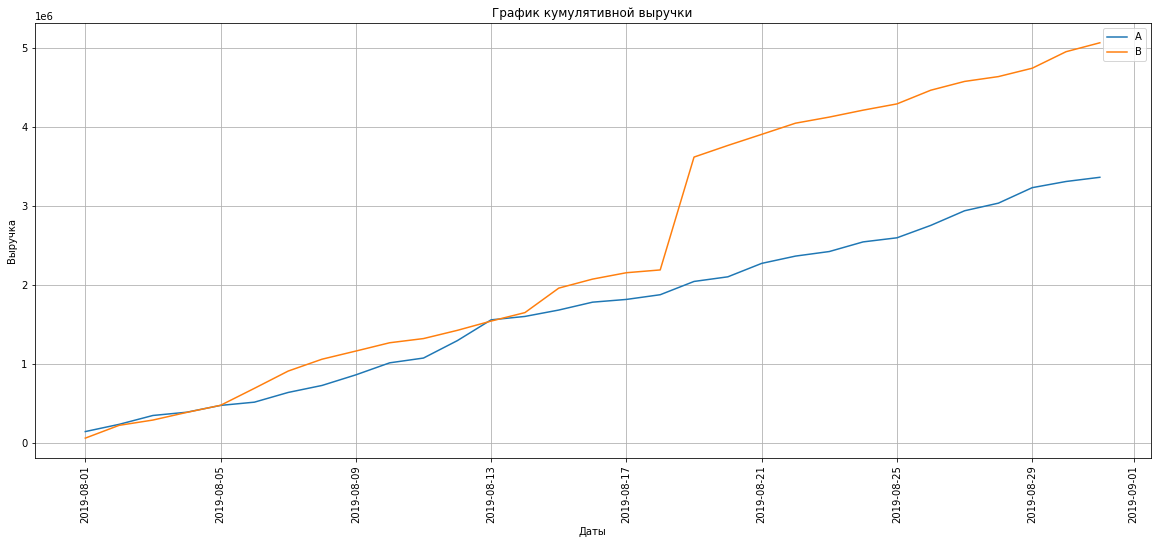

In [25]:
plt.figure(figsize=(20, 8))
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.grid()
plt.ylabel('Выручка')
plt.xlabel('Даты')
plt.title('График кумулятивной выручки')
plt.legend()
plt.xticks(rotation=90)
plt.show()


Вывод. Группа А практически на всем протяжени отстает от групппы В. В середине теста произошло событие, приведшиее к еще большему отрыву группы В от А

#### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

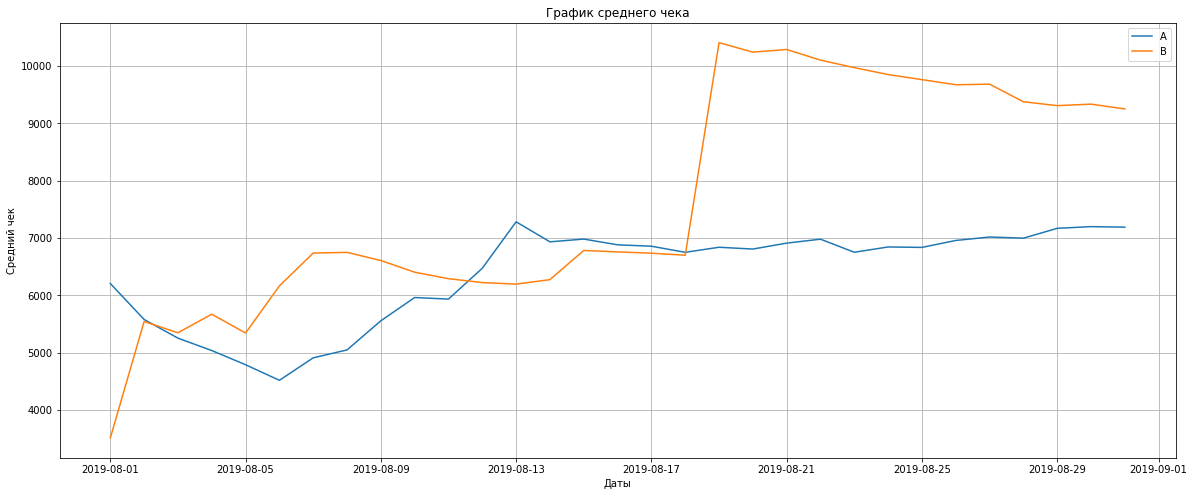

In [26]:
plt.figure(figsize=(20, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.ylabel('Средний чек')
plt.xlabel('Даты')
plt.title('График среднего чека')
plt.legend() 
plt.show()

Вывод. В середине теста у группы В резкий рост - это скорее всего связано с аномальным выбросом, либо резкое увеличение числа заказов, либо какая-то дорогостоящая покупка.

#### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

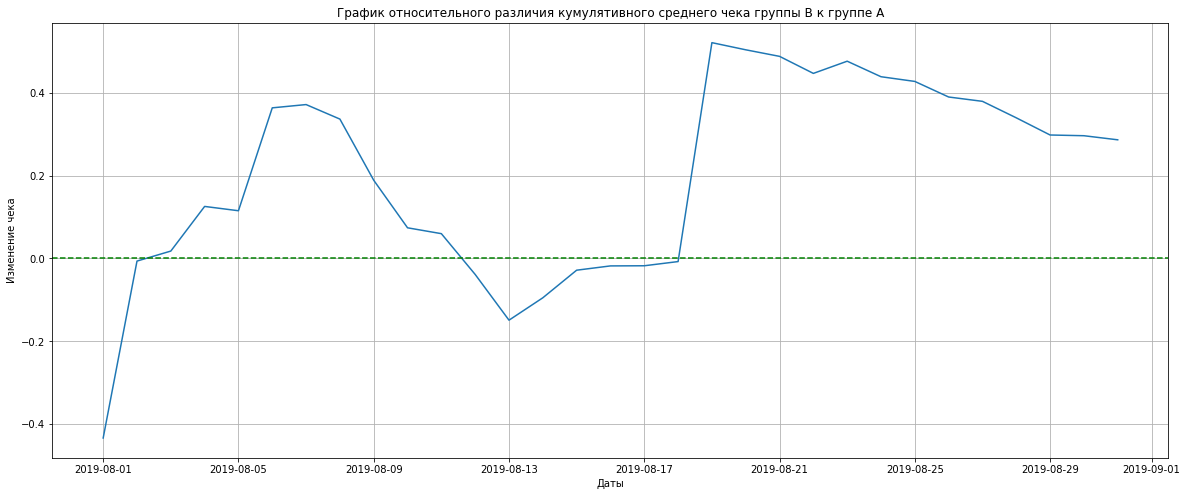

In [27]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(20, 8))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.grid()
plt.ylabel('Изменение чека')
plt.xlabel('Даты')
plt.title('График относительного различия кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='green', linestyle='--') 
plt.show()

Вывод. Видны резкие взлеты и падения на графике. Моменты резкого роста, по всей видимости это аномальный заказ

#### Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

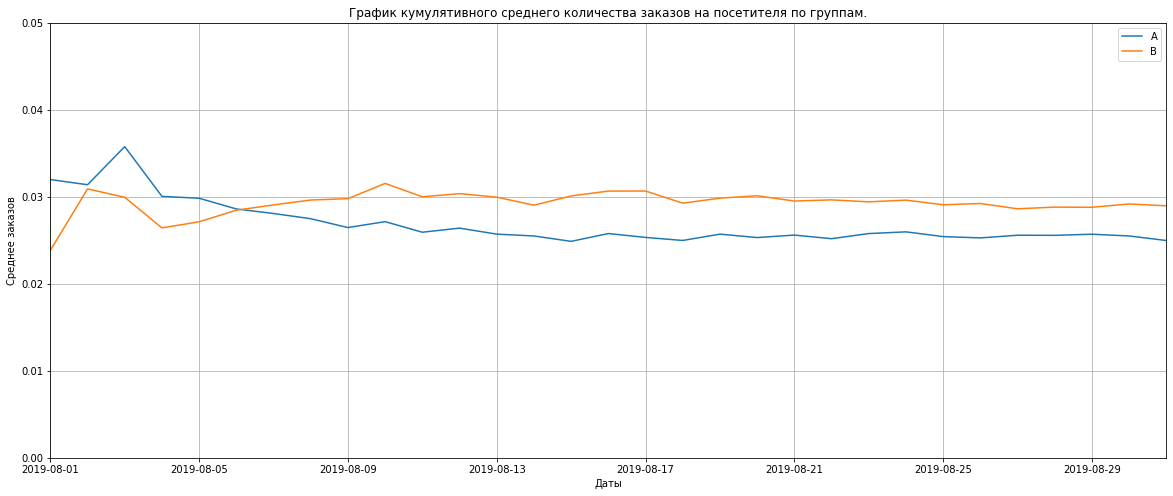

In [28]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(20, 8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.grid()
plt.ylabel('Среднее заказов')
plt.xlabel('Даты')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам.')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
plt.show()

В первые дни были скачки, но в дальнейшем все стабилизировалось. Группа В лидирует на протяжении всего времени

#### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

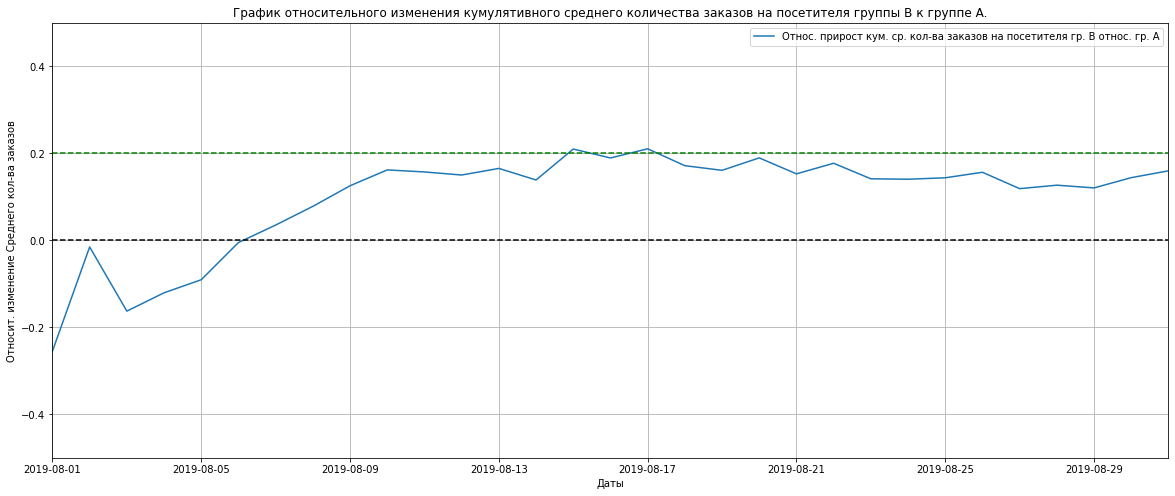

In [29]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(20, 8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относ. прирост кум. ср. кол-ва заказов на посетителя гр. B относ. гр. A")
plt.grid()
plt.ylabel('Относит. изменение Среднего кол-ва заказов')
plt.xlabel('Даты')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.')
plt.legend()


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='green', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.5, 0.5])
plt.show()

Вывод. У гр. В в среднем заказаов больше, чем у гр. А., этот показатель периодически доходит до 20%

#### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

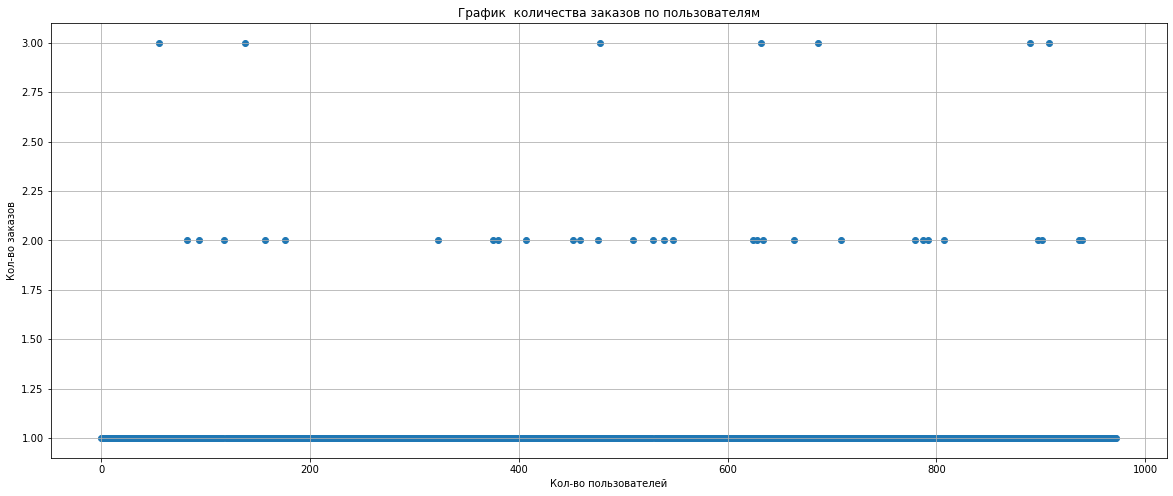

In [30]:
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
ordersByUsers.columns = ['userid', 'orders']
plt.figure(figsize=(20, 8))
plt.grid()
plt.ylabel('Кол-во заказов')
plt.xlabel('Кол-во пользователей')
plt.title('График  количества заказов по пользователям')


# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

В основном у людей по одному заказу, два заказа встречаются очень редко, а 3 - совсем редко

#### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [31]:
print('95-й и 99-й перцентили количества заказов на пользователя:', np.percentile(ordersByUsers['orders'], [ 95, 99]))

95-й и 99-й перцентили количества заказов на пользователя: [1. 2.]


Вывод. Подтвердился тот факт, что 95% людей совершают по 1 заказу. 2 и более заказа совершают менее 1 %

#### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

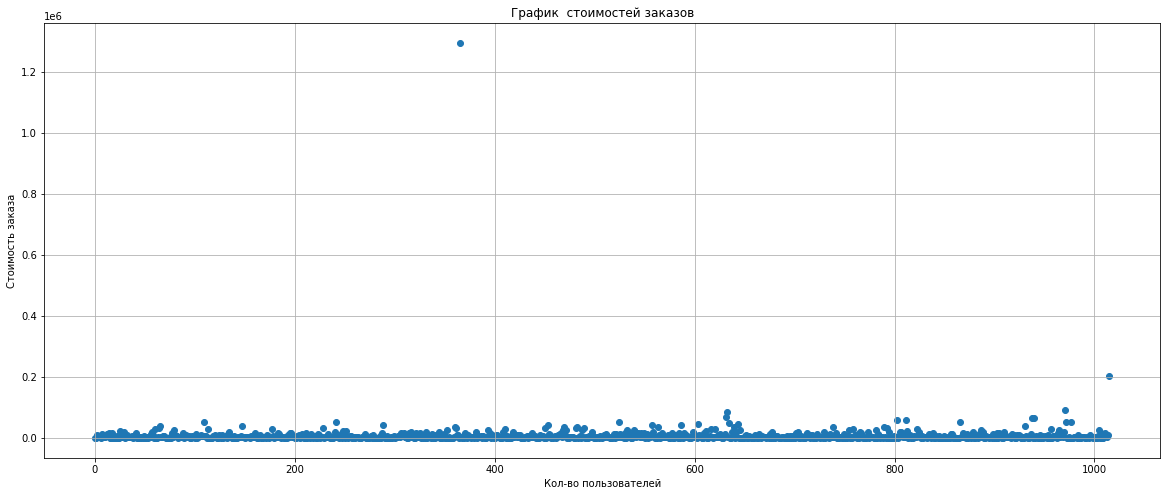

In [32]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(20, 8))
plt.grid()
plt.ylabel('Стоимость заказа')
plt.xlabel('Кол-во пользователей')
plt.title('График  стоимостей заказов')
plt.scatter(x_values, orders['revenue'])
plt.show()

In [33]:
orders['revenue'].sort_values(ascending = False).head(8) 
# выводим аномально дорогие заказы

425     1294500
1196     202740
1136      92550
744       86620
743       67990
1103      66350
1099      65710
949       60450
Name: revenue, dtype: int64

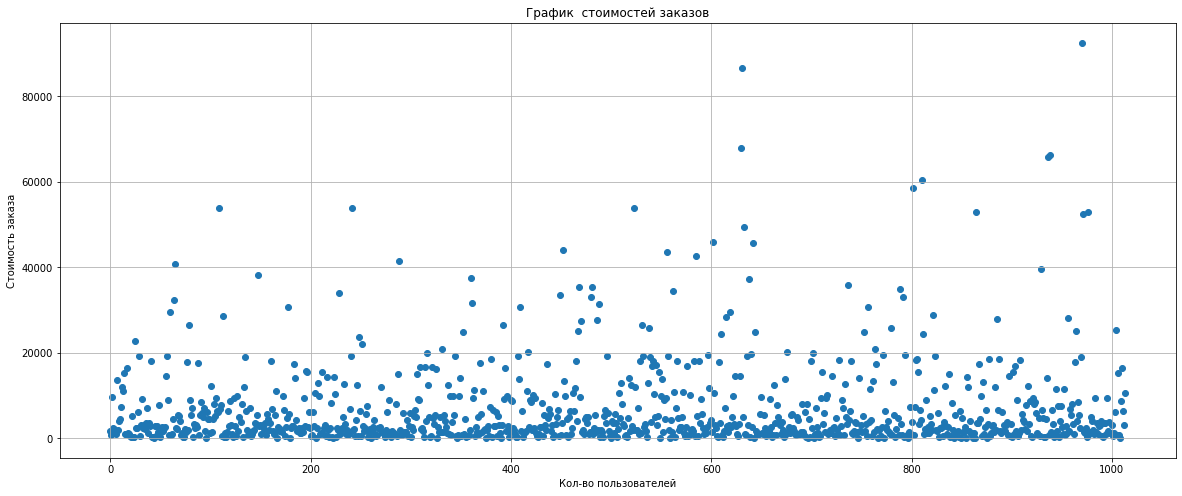

In [34]:
bezanomal = orders[orders['revenue']<100000]['revenue']
xx_values = pd.Series(range(0,len(bezanomal)))
plt.figure(figsize=(20, 8))

plt.grid()
plt.ylabel('Стоимость заказа')
plt.xlabel('Кол-во пользователей')
plt.title('График  стоимостей заказов')
plt.scatter(xx_values, bezanomal)
plt.show()
# строим график без аномальных значений

Удалили два выбивающихся заказа на 1294500 и  202740

#### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [35]:
print('95-й и 99-й перцентили стоимости заказов:', np.percentile(orders['revenue'], [ 95, 99]))

95-й и 99-й перцентили стоимости заказов: [26785. 53904.]


У 99% заказов стоимость меньше 53904

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

H0 - НЕТ Различий между группами всреднем количестве заказов на посетителя 

H1 - ЕСТЬ Различия между группами всреднем количестве заказов на посетителя

In [36]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userid', 'orders']



ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userid', 'orders'] 

# создали переменные
# Далее объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userid', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print("Значение p-value", "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Значимость различий в среднем кол-ве заказов на посетителя между группами ", "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Значение p-value 0.01102
Значимость различий в среднем кол-ве заказов на посетителя между группами  0.160


Так как p-value меньше 0.05, значит нулевую гипотезу отвергаем

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

H0- Различий между группами нет
H1 - Различия между группами есть

In [37]:
print("Значение p-value", '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Значимость различий в среднем чеке заказа между группами ", '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Значение p-value 0.829
Значимость различий в среднем чеке заказа между группами  0.287


Так как p-value больше 0.05, то нулевую гипотезу не отвергаем. Но наблюдаемое различие в 28.7 % не является статистически значимым по неочищенным данным

#### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

H0- Различий между группами нет
H1 - Различия между группами есть

In [38]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userid'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 53904]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
# аномалии свыше 2-х заказов и дороже 53904

In [39]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors[visitors['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


print("Значение p-value", '{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Значимость различий в среднем кол-ве заказов на посетителя между группами по очищенным данным ",'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Значение p-value 0.00702
Значимость различий в среднем кол-ве заказов на посетителя между группами по очищенным данным  0.189


Так как p-value меньше, чем 0.05, то нулевую гипотезу отвергаем

#### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

H0- Различий между группами нет
H1 - Различия между группами есть

In [40]:
print("Значение p-value",
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print("Значимость различий в среднем чеке заказа между группами после удаления аномалий",
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Значение p-value 0.788
Значимость различий в среднем чеке заказа между группами после удаления аномалий -0.032


Так как p-value больше 0.05, то нулевую гипотезу не отвергаем. По разнице средних чеков групп по очищенным данным, различий практически нет, всего на  3 % группа В меньше. В сырых данных были различия больше из-за нескольких аномлно дорогих покупок

#### Примем решение по результатам теста и объясним его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

#### Вывод

Считаю, что необходимо остановить тест и зафиксировать победу группы В. Потому что по всем результатам группа В впереди. Как по сырым данным, также и по очищенным. Если сравнивать средний чек, то разница между группами несущественна